<a href="https://colab.research.google.com/github/jelkinsjames/17D_code_examples/blob/main/242L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EE 242 Lab 2 – Convolution

Julian James, Jason Bently, Dylan Imayama, Neil Lindgren

(This should be a markup cell, which means that when you run it you just get formated text.)

In [ ]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import simpleaudio as sa
from scipy import ndimage
from skimage import color
# import whatever other modules you use in this lab -- there are more that you need than we've included 

ModuleNotFoundError: ignored

## Summary

In this lab, you will work through a series of exercises involving convolution of time signals and images.  This is a two-week lab.  You should plan on completing the first 3 assignments in the first week.

## Lab 2 turn in checklist

•	Pre-lab (upload to canvas before lab)

•	Lab 1 Jupyter notebook with code for the first 4 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

•	1 individual Jupyter notebook with code + markdown cells for the last exercise

Note: The pre-lab should be done individually, and all other assignments should be completed in groups of 3-4 people.


## Assignment 1 -- Simple Convolutions

In [ ]:
# Assignment 1 - Time Scaling Function

# Part A

# Create three discrete-time signals, assuming a time range of [0,12]
# x: input signal vector, a box of height 1 starting at time n=2 and ending at n=8
# h1: a pulse of length 4 & height 1 starting at time 0
# h2 = 1 at n=0, -1 at n=1, and 0 otherwise
x  = np.array([0,0,1,1,1,1,1,1,0,0,0,0,0])
h1 = np.array([1,1,1,1,0,0,0,0,0,0,0,0,0])
h2 = np.array([1,-1,0,0,0,0,0,0,0,0,0,0,0])

# Part B
y1 = np.convolve(x, h1)
y2 = np.convolve(x, h2)
# TODO: Code that solves B

# Part C
# Plot x, y1 and y2 in a 3x1 plot
# TODO: Code that solves C
x = np.append(x, np.zeros(7))
y1 = y1[0:20]
y2 = y2[0:20]
nx = np.arange(0,20,1)
ny1 = np.arange(0,20,1)
ny2 = np.arange(0,20,1)
f, (ax1, ax2, ax3) = plt.subplots(3, 1)
f.set_yaxis = ([-2, 5])
f.set_xaxis = ([0, 20])
ax1.stem(nx,x,use_line_collection=True)
ax2.stem(ny1,y1,use_line_collection=True)
ax3.stem(ny2,y2,use_line_collection=True)




<IPython.core.display.Javascript object>

<StemContainer object of 3 artists>

###  Discussion

The largest value of y1[n] occurs when h1 and x are completely overlapped in the convolution. The largest value of y2[n] occurs when the entire positive portion of h2 is overlapped with x and the negative portion of h2 is not overlapped with x in the convolution.

## Assignment 2 -- Smoothing Signals

Text(0.5, 1.0, 'Noisey vs smoothed - numpy function')

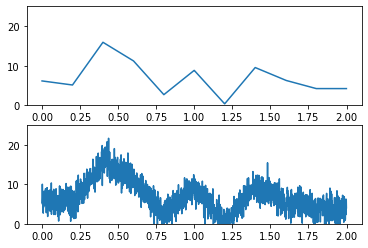

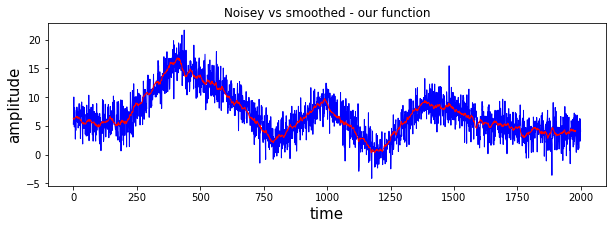

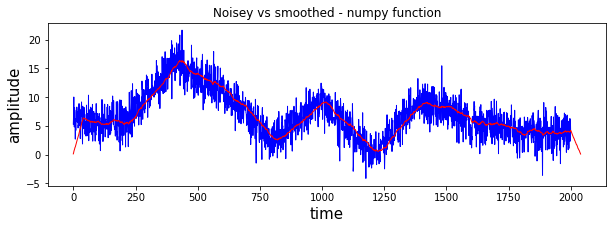

In [ ]:
# Assignment 2 - Amplitude Operations on Signals

# Part A
%matplotlib inline
# set up relevant parameters
srate = 1000 # sampling rate in Hz
time  = np.arange(0,2,1/srate) # associated time vector that corresponds to 2 seconds
n     = len(time) # length of the time vector

# here is a base signal to work with, values of signal points chosen randomly
p     = 10 # points for piecewise linear signal
amp = 20   # amplitude range of base signal
base = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*amp)

# create some random noise to be added to the above base signals
noiseamp = 2
noise  = noiseamp * np.random.randn(n)

# add noise to the base signals to create new noisy signals
noisy_signal = np.add(base, noise)
f, (b, n) = plt.subplots(2, 1)
b.set_ylim([0, 25])
b.plot(time, base)
n.set_ylim([0,25])
n.plot(time, noisy_signal)


# Part B
array_index_len  = len(noisy_signal) - 1
last_index       = 20 - 1

smoothed_data_arr  = []
start_index        = 0
while (last_index + start_index <= array_index_len):

    weight = 0    
    for i in range (20):
        weight += noisy_signal[start_index + i]
        
    temp_elem = weight/20
    smoothed_data_arr.append(temp_elem)
   
        
    start_index += 1
filtsig1 = np.array(smoothed_data_arr)

fig = plt.figure(figsize = (10,3))

plt.plot(noisy_signal, linewidth = 1, color = 'blue') 
plt.plot(filtsig1, linewidth = 1, color = 'red')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10) 

plt.xlabel('time', fontsize = 15)
plt.ylabel('amplitude', fontsize = 15)
plt.title('Noisey vs smoothed - our function')
# Part C
# implement smoothing using convolution
hfilt = np.ones(41) * 1/41
filtsig2 = np.convolve(noisy_signal, hfilt)

fig = plt.figure(figsize = (10,3))

plt.plot(noisy_signal, linewidth = 1, color = 'blue') 
plt.plot(filtsig2, linewidth = 1, color = 'red')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10) 

plt.xlabel('time', fontsize = 15)
plt.ylabel('amplitude', fontsize = 15)
plt.title('Noisey vs smoothed - numpy function')




###  Discussion

The method we designed and the np.convolve() function have a very similar effect with the exception that np.convolve() does not handle edge cases. The code we wrote replaces the value of each point in the noisy signal with the average value of the surrounding points to smooth the signal out. Amplified noise in the input signal results in a rougher output, and a higher k value results in a smoother output.

## Assignment 3 -- Removing Noise from an Audio Signal 

In [ ]:
# Assignment 3 -- Title of assignment 3

# Part A
# TODO: Code that solves A
fst, tr_orig = wav.read('trombone11.wav')
print(str(fst))
noiseamp = 100
noise  = noiseamp * np.random.randn(len(tr_orig))
tr_noisy = np.add(tr_orig, noise)

# Part B
tr_filt = np.convolve(tr_noisy,hfilt)

# Part C
# TODO: Code that solves C
wav.write('tr_noisy.wav', fst, tr_noisy.astype('int16'))
wav.write('tr_filt.wav', fst, tr_filt.astype('int16'))
wav_obj_noisy = sa.WaveObject.from_wave_file('tr_noisy.wav')
wav_obj_filt = sa.WaveObject.from_wave_file('tr_filt.wav')

play_obj_noisy = wav_obj_noisy.play()
play_obj_noisy.wait_done()

play_obj_filt = wav_obj_filt.play()
play_obj_filt.wait_done()



FileNotFoundError: ignored

###  Discussion

Before the noise was added, the original trumpet sound was soft and clear. After the noise was added, the sound was scratchy, and it sounded like static was overlayed on it. Once the sound was smoothed again, it was imperfect, but almost as clear as the original. Larger values of k had a stronger smoothing effect than small values of k. 

## Assignment 4 -- Convolution with Images

In [ ]:
# Part A
def sobel(image):
    x1 = image.copy()
    x2 = image.copy()
    h1 = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])
    h2 = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])
    y1h = ndimage.filters.convolve(x, h1)
    y2v = ndimage.filters.convolve(x, h2)
    y = np.sqrt(np.power(y1h, 2) + np.power(y2v, 2))
    return y1h, y2v, y

In [ ]:
#Part B
image = color.rgb2gray(plt.imread('dragonfly.jpg'))
y1h, y2v, y = sobel(image)

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(y1h)
axarr[0,1].imshow(y2v)
axarr[1,0].imshow(y)
axarr[1,1].imshow(image)

#Part C
kernel_10 = np.multiply(np.ones((10, 10)), 1/100)
image_10 = ndimage.filters.convolve(image.copy(), kernel_10)
fig, plot_c = plt.subplots(1,2)
plot_c[0].imshow(image)
plot_c[1].imshow(image_10)
#Part D
dy1h, dy2v, dy = sobel(image_10)
f, axarr = plt.subplots(2,4)
axarr[0,0].imshow(dy1h)
axarr[0,1].imshow(dy2v)
axarr[1,0].imshow(dy)
axarr[1,1].imshow(image_10)
axarr[0,2].imshow(y1h)
axarr[0,3].imshow(y2v)
axarr[1,2].imshow(y)
axarr[1,3].imshow(image)

### Discussion

Describe the differences in the results using the edge detector or the original and smoothed image. Comment on how the results change if you use a larger size smoothing filter.